# Import packages

In [24]:
import numpy as np
from numpy import sin, cos, exp, pi
import pandas as pd
import os
import matplotlib.pyplot as plt

# Model Parameters

In [29]:
E0 = 0 # standard potential of redox couple in V
n=1 # number of electrons per rxn
F=96485 # charge of electron in C/mol
R=8.31 # gas constant in J/mol/K
T=298 # temperature in K
A=1 # area in cm^2
D=1e-5 # diffusion constant in cm^2/s
ctotal=1e-6 # total concentration of redox species in mol/cm^3
Rct0 = 0 # charge-transfer resistance at E0 in ohms
Cd = 10e-6 #  double layer capacitance in F
Ru = 0 # uncompensated cell resistance in ohms

# ACV Model Initial Plot

This is the initial ACV plot. Subsequent plots from cell block 2 will be added to the plot under Code Block 1. To reset the canvas, run Code Block 1 again

In [8]:
# Code Block 1

import matplotlib
%matplotlib notebook
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 70em; width:150em}</style>"))

'''ACV Experimental Parameters'''
f_ACV = 1 # periodic frequency in Hz

# DC Potential to sweep in ACV
start_pot = -.25 # initial potential in volts
end_pot = +.25 # final potential in volts
ACV_potential_range = np.arange(start_pot, end_pot, 0.005)

'''calculate admittances and impedances of ACV by progressively adding components'''
# lists to store ACV sweep results
ACV_pot_DC =[]
Yin_ACV_total=[]
Yout_ACV_total=[]

for E_DC_ACV in ACV_potential_range:
    
    # charge transfer resistance for redox assuming alpha = 0.5
    Rct_ACV = Rct0 * (exp((E_DC_ACV-E0)/(2*R*T/n/F)) + exp(-(E_DC_ACV-E0)/(2*R*T/n/F)))/2
    # from equation 13 with E_cell replaced by E_DC
    Credox_ACV = (n**2*F**2/R/T)*A*(D/(2*pi*f_ACV))**0.5*ctotal*exp(-(E_DC_ACV-E0)/(R*T/n/F))*(1+exp(-(E_DC_ACV-E0)/(R*T/n/F)))**(-2)
    
    # in-phase/out-of-phase impedance of charge transfer
    Zin_ACV = Rct_ACV
    # Zout_ACV = 0

    # in-phase/out-of-phase impedance of redox branch of circuit
    Zin_ACV = Zin_ACV + 1/(2*pi*f_ACV*Credox_ACV) # Rdiff
    Zout_ACV = 1/(2*pi*f_ACV*Credox_ACV)  # The actual Credox

    # in-phase/out-of-phase admittance of redox branch of circuit
    Yin_ACV = Zin_ACV/(Zin_ACV**2 + Zout_ACV**2)
    Yout_ACV = Zout_ACV/(Zin_ACV**2 + Zout_ACV**2)

    #in-phase/out-of-phase admittance of redox and double-layer parallel branches of circuit
    Yin_ACV = Yin_ACV # = ω Credox
    Yout_ACV = Yout_ACV + 2*pi*f_ACV*Cd # ω Credox + ω Cd

    #in-phase/out-of-phase impedance of redox and double-layer parallel branches of circuit
    Zin_ACV = Yin_ACV/(Yin_ACV**2 + Yout_ACV**2) 
    Zout_ACV = Yout_ACV/(Yin_ACV**2 + Yout_ACV**2)

    # in-phase/out-of-phase impedance of entire circuit
    Zin_ACV = Zin_ACV + Ru
    # Zout_ACV = Zout_ACV

    # in-phase/ out-of-phase admittance of entire circuit
    Yin_ACV = Zin_ACV/(Zin_ACV**2 + Zout_ACV**2)
    Yout_ACV = Zout_ACV/(Zin_ACV**2 + Zout_ACV**2)
    
    # append data
    ACV_pot_DC.append(E_DC_ACV) 
    Yin_ACV_total.append(Yin_ACV)
    Yout_ACV_total.append(Yout_ACV)

''' plot data '''
fig, ax1 = plt.subplots(figsize = (9, 6))
fig.subplots_adjust(left=0.1, bottom=0.09, right=0.65, top=0.95, wspace=0, hspace=0.03)
from cycler import cycler
cc1 = (cycler(color=list('rgbcmy')) *
      cycler(linestyle=['-', '--']))

# subplot 1
ax1.set_title('AC Voltammogram')
ax1.tick_params(axis='both',which='both',direction='in',right=True, top=True)
ax1.set_prop_cycle(cc1)
ax1.plot(ACV_pot_DC, Yin_ACV_total, label = str(f_ACV)+' Hz in-phase')
ax1.plot(ACV_pot_DC, Yout_ACV_total, label = str(f_ACV)+' Hz out-of-phase')
ax1.set_xlabel('Potential / V')
ax1.set_ylabel('Admittance / S')
ax1.set_yscale('log')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # move the legend

<IPython.core.display.Javascript object>

# ACV additional Plots

Running block 2 will add plots to the interactive window under cell block 1. 

In [30]:
# Code Block 2

'''Modified ACV Experimental Parameters'''
f_ACV = 10000 # periodic frequency in Hz

'''recalcuate admittances and impedances of ACV by progressively adding components'''
# lists to store ACV sweep results
ACV_pot_DC =[]
Yin_ACV_total=[]
Yout_ACV_total=[]

for E_DC_ACV in ACV_potential_range:
    
    # charge transfer resistance for redox assuming alpha = 0.5
    Rct_ACV = Rct0*(exp((E_DC_ACV-E0)/(2*R*T/n/F))+exp(-(E_DC_ACV-E0)/(2*R*T/n/F)))/2
    # from equation 13 with E_cell replaced by E_DC
    Credox_ACV = (n**2*F**2/R/T)*A*(D/(2*pi*f_ACV))**0.5*ctotal*exp(-(E_DC_ACV-E0)/(R*T/n/F))*(1+exp(-(E_DC_ACV-E0)/(R*T/n/F)))**(-2)
    
    # in-phase/out-of-phase impedance of charge transfer
    Zin_ACV = Rct_ACV
    # Zout_ACV = 0

    # in-phase/out-of-phase impedance of redox branch of circuit
    Zin_ACV = Zin_ACV + 1/(2*pi*f_ACV*Credox_ACV) 
    Zout_ACV = 1/(2*pi*f_ACV*Credox_ACV)  

    # in-phase/out-of-phase admittance of redox branch of circuit
    Yin_ACV = Zin_ACV/(Zin_ACV**2 + Zout_ACV**2)
    Yout_ACV = Zout_ACV/(Zin_ACV**2 + Zout_ACV**2)

    #in-phase/out-of-phase admittance of redox and double-layer parallel branches of circuit
    Yin_ACV = Yin_ACV
    Yout_ACV = Yout_ACV + 2*pi*f_ACV*Cd

    #in-phase/out-of-phase impedance of redox and double-layer parallel branches of circuit
    Zin_ACV = Yin_ACV/(Yin_ACV**2 + Yout_ACV**2) 
    Zout_ACV = Yout_ACV/(Yin_ACV**2 + Yout_ACV**2)

    # in-phase/out-of-phase impedance of entire circuit
    Zin_ACV = Zin_ACV + Ru
    Zout_ACV = Zout_ACV

    # in-phase/ out-of-phase admittance of entire circuit
    Yin_ACV = Zin_ACV/(Zin_ACV**2 + Zout_ACV**2)
    Yout_ACV = Zout_ACV/(Zin_ACV**2 + Zout_ACV**2)
    
    
    # append data
    ACV_pot_DC.append(E_DC_ACV) 
    Yin_ACV_total.append(Yin_ACV)
    Yout_ACV_total.append(Yout_ACV)

''' plot data '''
# subplot 1
ax1.plot(ACV_pot_DC, Yin_ACV_total,label = str(f_ACV)+' Hz in-phase')
ax1.plot(ACV_pot_DC, Yout_ACV_total, label = str(f_ACV)+' Hz out-of-phase')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # move the legend


# redrew plot with new data
fig.canvas.draw()

<IPython.core.display.Javascript object>


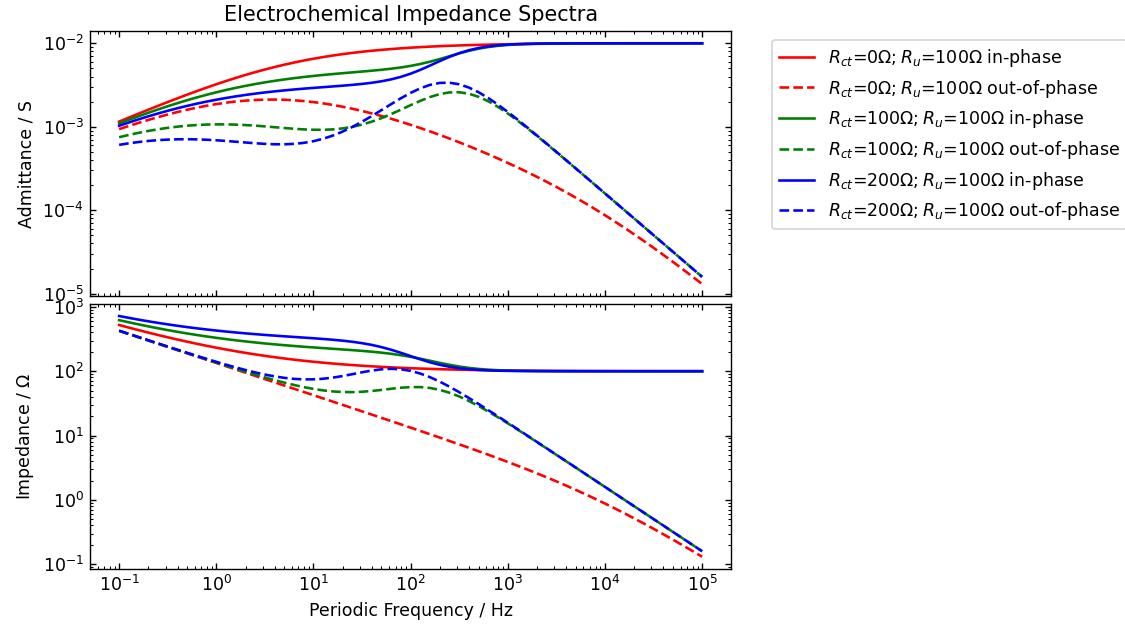

<IPython.core.display.Javascript object>


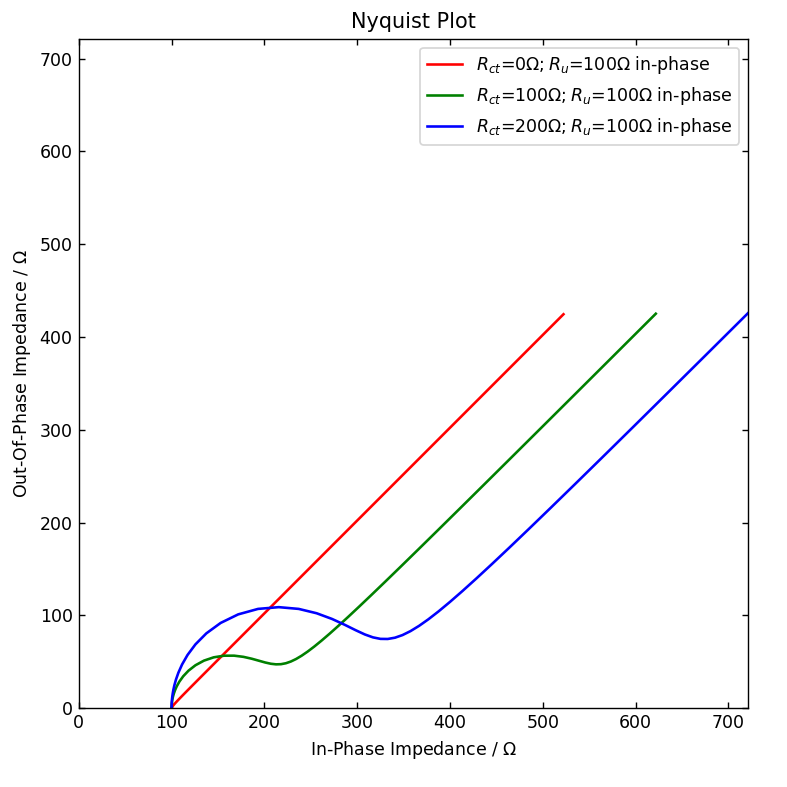

(0.0, 522.2319525738266)

In [40]:
# Code Block 3

import matplotlib
%matplotlib notebook
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 70em; width:150em}</style>"))

'''EIS Experimental Parameters'''
E_DC_EIS = 0 # DC potential of EIS in volts
Rct0 = 0 # charge-transfer resistance at E0 in ohms
Ru =100 # uncompensated cell resistance in ohms

# Frequency range array for EIS (default freq range goes from 0.1 Hz to 100 kHz )
powers = np.arange(-1, 5.1, 0.1)
freq_range = np.array([10**power for power in powers])

'''calcuate admittances and impedances of EIS by progressively adding components'''
# lists to store EIS sweep results
EIS_freq =[]
Yin_EIS_total=[]
Yout_EIS_total=[]
Zin_EIS_total=[]
Zout_EIS_total=[]

for f_EIS in freq_range:
    
    # charge transfer resistance for redox assuming alpha = 0.5
    Rct_EIS = Rct0*(exp((E_DC_EIS-E0)/(2*R*T/n/F))+exp(-(E_DC_EIS-E0)/(2*R*T/n/F)))/2
    # equation 13 with E_cell replaced by E_DC
    Credox_EIS = (n**2*F**2/R/T)*A*(D/(2*pi*f_EIS))**0.5*ctotal*exp(-(E_DC_EIS-E0)/(R*T/n/F))*(1+exp(-(E_DC_EIS-E0)/(R*T/n/F)))**(-2)
    
    # in/out of-phase impedance of charge transfer
    Zin_EIS = Rct_EIS
    # Zout_EIS = 0
    
    #in/out-of-phase impedance of redox branch of circuit
    Zin_EIS = Zin_EIS + 1./(2*pi*f_EIS*Credox_EIS)
    Zout_EIS = 1/(2*pi*f_EIS*Credox_EIS)
    
    #in/out-of-phase admittance of redox branch of circuit
    Yin_EIS = Zin_EIS/(Zin_EIS**2 + Zout_EIS**2)
    Yout_EIS = Zout_EIS/(Zin_EIS**2 + Zout_EIS**2)
    
    # in/out-of-phase admittance of redox and double-layer parallel branches of circuit
    Yin_EIS = Yin_EIS 
    Yout_EIS = Yout_EIS + 2*pi*f_EIS*Cd
    
    #in/out-of-phase impedance of redox and double-layer parallel branches of circuit
    Zin_EIS = Yin_EIS/(Yin_EIS**2 + Yout_EIS**2)
    Zout_EIS = Yout_EIS/(Yin_EIS**2 + Yout_EIS**2)
    
    #in/out of-phase impedance of entire circuit
    Zin_EIS = Zin_EIS + Ru
    Zout_EIS = Zout_EIS
    
    #in/out of-phase admittance of entire circuit
    Yin_EIS = Zin_EIS/(Zin_EIS**2 + Zout_EIS**2)
    Yout_EIS = Zout_EIS/(Zin_EIS**2 + Zout_EIS**2)
    
    # append data
    EIS_freq.append(f_EIS) 
    Yin_EIS_total.append(Yin_EIS)
    Yout_EIS_total.append(Yout_EIS)
    Zin_EIS_total.append(Zin_EIS)
    Zout_EIS_total.append(Zout_EIS)
    
# set up a 2 x 1 grid for the plot
grid = plt.GridSpec(2, 1, wspace=0, hspace=0.03)
fig2 = plt.figure("Figure 2", figsize = (9, 5))   
ax1 = fig2.add_subplot(grid[0, 0])
ax2 = fig2.add_subplot(grid[1, 0], sharex = ax1)

fig2.subplots_adjust(left=0.08, bottom=0.09, right=0.65, top=0.95, wspace=0, hspace=0.03)

from cycler import cycler
cc1 = (cycler(color=list('rgbcmy')) *
      cycler(linestyle=['-', '--']))
cc2 = (cycler(color=list('rgbcmy')))

# subplot 1
ax1.set_title('Electrochemical Impedance Spectra')
ax1.tick_params(axis='both',which='both',direction='in',right=True, top=True)
ax1.tick_params(labelbottom=False) 
ax1.set_prop_cycle(cc1)
ax1.plot(EIS_freq, Yin_EIS_total, label = '$R_{ct}$=' + str(Rct0) +'$\Omega; R_{u}$=' + str(Ru) +'$\Omega$ in-phase')
ax1.plot(EIS_freq, Yout_EIS_total, label = '$R_{ct}$=' + str(Rct0) +'$\Omega; R_{u}$=' + str(Ru) +'$\Omega$ out-of-phase')
ax1.set_ylabel('Admittance / S')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # move the legend

# subplot 2
ax2.tick_params(axis='both',which='both',direction='in',right=True, top=True)
ax2.set_prop_cycle(cc1)
ax2.plot(EIS_freq, Zin_EIS_total)
ax2.plot(EIS_freq, Zout_EIS_total)
ax2.set_ylabel('Impedance / $\Omega$')
ax2.set_xlabel('Periodic Frequency / Hz')
ax2.set_xscale('log')
ax2.set_yscale('log')

# subplot 3
fig3 = plt.figure("Figure 3", figsize = (6.3, 6.3))
fig3.subplots_adjust(left=0.1, bottom=0.1, right=0.95, top=0.95, wspace=0, hspace=0.03)
ax3 = fig3.add_subplot()

ax3.set_title('Nyquist Plot')
ax3.tick_params(axis='both',which='both',direction='in',right=True, top=True)
ax3.set_prop_cycle(cc2)
ax3.plot(Zin_EIS_total, Zout_EIS_total, label = '$R_{ct}$=' + str(Rct0) +'$\Omega; R_{u}$=' + str(Ru) +'$\Omega$ in-phase')
ax3.set_ylabel('Out-Of-Phase Impedance / $\Omega$')
ax3.set_xlabel('In-Phase Impedance / $\Omega$')
if (max(Zin_EIS_total) >= max(Zout_EIS_total)):
    axes_max = max(Zin_EIS_total)
else:
    axes_max = max(Zout_EIS_total)
ax3.set_xlim ([0,axes_max])
ax3.set_ylim ([0,axes_max])



In [42]:
# Code Block 4

'''Modified EIS Experimental Parameters'''
E_DC_EIS = 0 # DC potential of EIS in volts
Rct0 = 200 # charge-transfer resistance at E0 in ohms
Ru = 100 # uncompensated cell resistance in ohms

# Frequency range array for EIS (default freq range goes from 0.1 Hz to 100 kHz )
powers = np.arange(-1, 5.1, 0.1)
freq_range = np.array([10**power for power in powers])

'''crealcuate admittances and impedances of EIS by progressively adding components'''
# lists to store EIS sweep results
EIS_freq =[]
Yin_EIS_total=[]
Yout_EIS_total=[]
Zin_EIS_total=[]
Zout_EIS_total=[]

for f_EIS in freq_range:
    
    # charge transfer resistance for redox assuming alpha = 0.5
    Rct_EIS = Rct0*(exp((E_DC_EIS-E0)/(2*R*T/n/F))+exp(-(E_DC_EIS-E0)/(2*R*T/n/F)))/2
    # equation 13 with E_cell replaced by E_DC
    Credox_EIS = (n**2*F**2/R/T)*A*(D/(2*pi*f_EIS))**0.5*ctotal*exp(-(E_DC_EIS-E0)/(R*T/n/F))*(1+exp(-(E_DC_EIS-E0)/(R*T/n/F)))**(-2)
    
    # in/out of-phase impedance of charge transfer
    Zin_EIS = Rct_EIS
    # Zout_EIS = 0
    
    #in/out-of-phase impedance of redox branch of circuit
    Zin_EIS = Zin_EIS + 1./(2*pi*f_EIS*Credox_EIS)
    Zout_EIS = 1/(2*pi*f_EIS*Credox_EIS)
    
    #in/out-of-phase admittance of redox branch of circuit
    Yin_EIS = Zin_EIS/(Zin_EIS**2 + Zout_EIS**2)
    Yout_EIS = Zout_EIS/(Zin_EIS**2 + Zout_EIS**2)
    
    # in/out-of-phase admittance of redox and double-layer parallel branches of circuit
    Yin_EIS = Yin_EIS 
    Yout_EIS = Yout_EIS + 2*pi*f_EIS*Cd
    
    #in/out-of-phase impedance of redox and double-layer parallel branches of circuit
    Zin_EIS = Yin_EIS/(Yin_EIS**2 + Yout_EIS**2)
    Zout_EIS = Yout_EIS/(Yin_EIS**2 + Yout_EIS**2)
    
    #in/out of-phase impedance of entire circuit
    Zin_EIS = Zin_EIS + Ru
    Zout_EIS = Zout_EIS
    
    #in/out of-phase admittance of entire circuit
    Yin_EIS = Zin_EIS/(Zin_EIS**2 + Zout_EIS**2)
    Yout_EIS = Zout_EIS/(Zin_EIS**2 + Zout_EIS**2)
    
    # append data
    EIS_freq.append(f_EIS) 
    Yin_EIS_total.append(Yin_EIS)
    Yout_EIS_total.append(Yout_EIS)
    Zin_EIS_total.append(Zin_EIS)
    Zout_EIS_total.append(Zout_EIS)
    
# subplot 1
ax1.plot(EIS_freq, Yin_EIS_total, label = '$R_{ct}$=' + str(Rct0) +'$\Omega; R_{u}$=' + str(Ru) +'$\Omega$ in-phase')
ax1.plot(EIS_freq, Yout_EIS_total, linestyle='--', label = '$R_{ct}$=' + str(Rct0) +'$\Omega; R_{u}$=' + str(Ru) +'$\Omega$ out-of-phase')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # move the legend

# subplot 2
ax2.plot(EIS_freq, Zin_EIS_total, label = '$R_{ct}$=' + str(Rct0) +'$\Omega; R_{u}$=' + str(Ru) +'$\Omega$ in-phase')
ax2.plot(EIS_freq, Zout_EIS_total, linestyle='--', label = '$R_{ct}$=' + str(Rct0) +'$\Omega; R_{u}$=' + str(Ru) +'$\Omega$ in-phase')

# subplot 3
ax3.plot(Zin_EIS_total, Zout_EIS_total, label = '$R_{ct}$=' + str(Rct0) +'$\Omega; R_{u}$=' + str(Ru) +'$\Omega$ in-phase')
if (max(Zin_EIS_total) >= max(Zout_EIS_total)):
    axes_max = max(Zin_EIS_total)
else:
    axes_max = max(Zout_EIS_total)
ax3.set_xlim ([0,axes_max])
ax3.set_ylim ([0,axes_max])

plt.legend()

# redrew plot with new data
fig.canvas.draw()
         